In [1]:
import os

import pandas as pd, numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("plots"):
    os.mkdir("plots")

In [2]:
scan_types = ['negative', 'positive']

In [3]:
def get_color():
    return (np.random.rand(), np.random.rand(), np.random.rand())

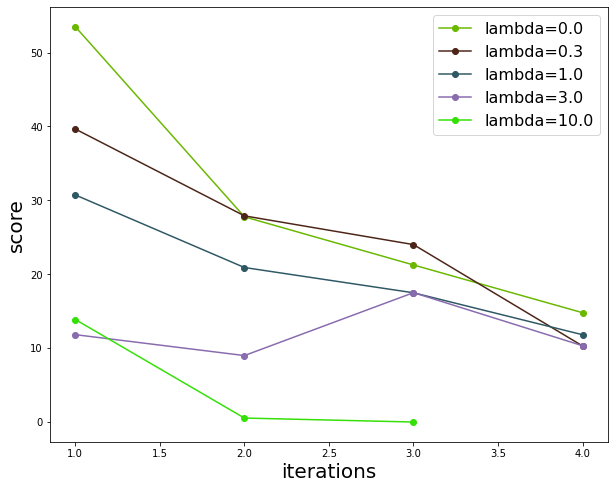

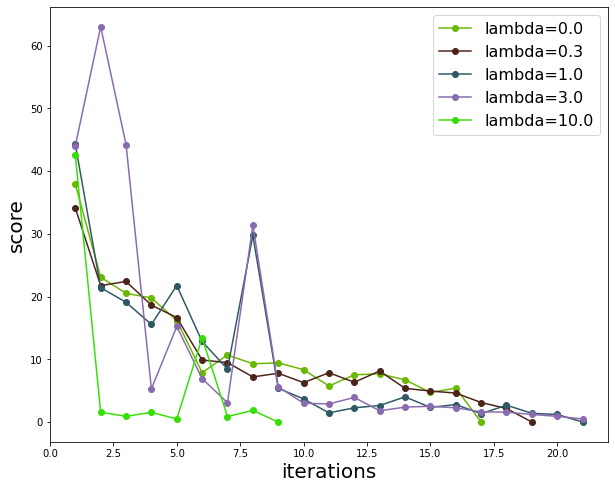

In [4]:
for scan_type in scan_types:
    german_credit_mit_2_df = pd.read_csv("datasets/german_credit_mit_2_" + scan_type[:3] + ".csv")
    german_credit_mit_2_df = german_credit_mit_2_df.loc[german_credit_mit_2_df['scan_type'] == scan_type]

    group_df = german_credit_mit_2_df.groupby(['lambda', 'iteration']).mean().reset_index()

    # plot score curves
    np.random.seed(1)
    score_fig = plt.figure(figsize=(10, 8))
    lambda_vals = list(set(list(group_df['lambda'])))
    lambda_vals.sort()
    for lambda_val in lambda_vals:
        score_lambda_df = group_df.loc[group_df['lambda'] == lambda_val]
        color = get_color()
        plt.plot(score_lambda_df['iteration'], score_lambda_df['score'], label='lambda={}'.format(lambda_val), color=color, marker='o')

    # plt.title("Score vs. iterations for Mitigation 1", fontsize=24)
    plt.xlabel("iterations", fontsize=20)
    plt.ylabel("score", fontsize=20)
    plt.legend(loc=1, prop={'size': 16})
    score_fig.savefig("plots/german_credit_mit_2_" + scan_type[:3] + "_score.png", format="png")
    # plt.show()